In [1]:
# IMPORTING ALL THE NECESSARY LIBRARIES
from IPython.display import Audio
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import accuracy_score,log_loss, confusion_matrix,ConfusionMatrixDisplay

import os
for dirname, _, filenames in os.walk('data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
dirname = '/Users/abhimansakilam/Downloads/ENDSEM_SPEECH/end_semester_2023/'        



In [2]:
!pip install tqdm

In [3]:

import warnings
warnings.filterwarnings("ignore")

##  Read data.csv in pandas


In [4]:

d = pd.read_csv("data.csv")
d['filename'] = d['filename'].apply(lambda x: os.path.join(dirname,x))
d['gender'] = d['gender'].astype('category')
d.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,/Users/abhimansakilam/Downloads/ENDSEM_SPEECH/...
1,non_dysarthria,female,/Users/abhimansakilam/Downloads/ENDSEM_SPEECH/...
2,non_dysarthria,female,/Users/abhimansakilam/Downloads/ENDSEM_SPEECH/...
3,non_dysarthria,female,/Users/abhimansakilam/Downloads/ENDSEM_SPEECH/...
4,non_dysarthria,female,/Users/abhimansakilam/Downloads/ENDSEM_SPEECH/...


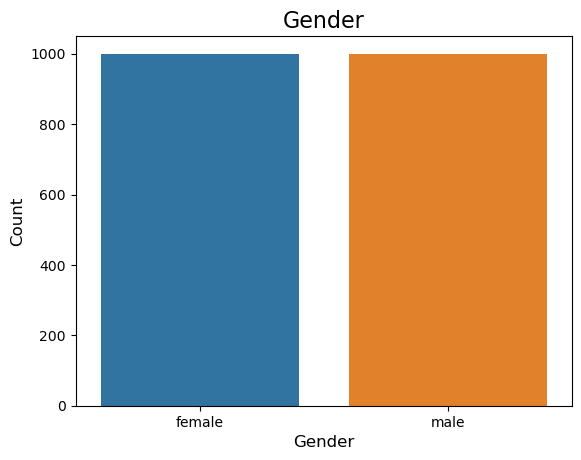

In [5]:
plt.title('Gender', size=16)
sns.countplot(x='gender', data=d)
plt.ylabel('Count', size=12)
plt.xlabel('Gender', size=12)
plt.show()

Text(0.5, 0, 'Gender')

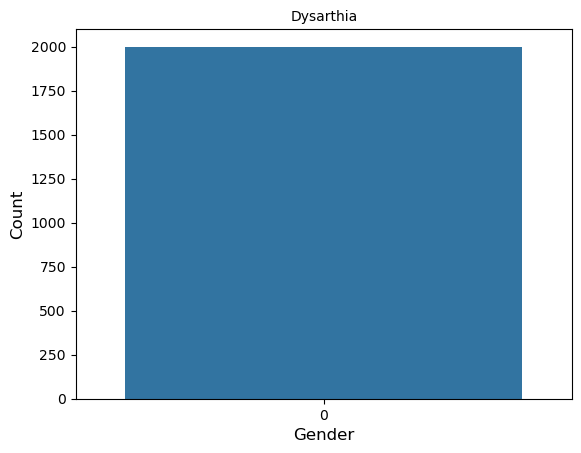

In [6]:
# plt.title('Dysarthia', size=10)
# sns.countplot( d.is_dysarthria)
# plt.ylabel('Count', size=12)
# plt.xlabel('Gender', size=12)
# sns.despine(top=True, right=True, left=False, bottom=False)
# plt.show()
d['is_dysarthria_numeric'] = d['is_dysarthria'].apply(lambda x: 1 if x == 'dysarthria' else 0)

# plot the countplot using the new column
plt.title('Dysarthia', size=10)
sns.countplot(d['is_dysarthria_numeric'])
plt.ylabel('Count', size=12)
plt.xlabel('Gender', size=12)


## For any 1 random sample of dysarthric male, dysarthric female, non-dysarthric male, and non-dysarthric female, visualize
###  a. Waveplot
###  b. Spectrogram
###  c. Zero Crossing rate
###  d. Spectral Centroid and rolloff,
###  e. MFCC
###  f. Mel Spectrogram



In [7]:
def create_waveplot(data, sr, i):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {}'.format(i), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def create_mel_Spectogram(data, sr, i):
    plt.figure(figsize=(10, 3))
    plt.title('Mel Spectrogram of audio {} emotion'.format(i), size=15)
    mel_spec = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
    plt.show()

    
def create_Spectogram(data, sr, i): # have to check which is spect on log
    
    plt.figure(figsize=(10, 3))
    plt.title('Spectrogram of audio {} '.format(i), size=15)
    X = librosa.stft(data)
    
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb,sr = sr, x_axis="time",y_axis = "log")
    plt.show() 
        
    
def create_Zero_crossing_rate(data, sr, i):
    
    zero_crossings = librosa.zero_crossings(data)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(10, 3))
    plt.title('Zero Crossing Rate of audio {} '.format(i), size=15)
    zcrs = librosa.feature.zero_crossing_rate(data)
    plt.plot(zcrs[0])
    plt.show()    
    
def create_mfcc(data, sr, i):
    
    plt.figure(figsize=(10, 3))
    plt.title('MFCC of audio {} '.format(i), size=15)
    mfccs = librosa.feature.mfcc(y=data, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.show()
    
def create_Spectral_rolloff(data, sr, i):
    
    plt.figure(figsize=(10, 3))
    plt.title('Spectral Rolloff of audio {} '.format(i), size=15)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=data, sr=sr)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(data, sr=sr, alpha=0.4)
    plt.plot(t, spectral_rolloff, color='r')
    plt.show()
   
    
# def create_Spectral_centroid(data, sr, i):

#     plt.figure(figsize=(10, 3))
#     plt.title('Spectral Centroids of audio {} '.format(i), size=15)
#     spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
#     frames = range(len(spectral_centroids))
#     t = librosa.frames_to_time(frames)
#     librosa.display.waveshow(data, sr=sr, alpha=0.4)
#     plt.plot(t, spectral_centroids, color='r')
#     plt.show()  
    
def create_Spectral_centroid(data, sr, i):
    plt.figure(figsize=(10, 3))
    plt.title('Spectral Centroids of audio {} '.format(i), size=15)
    spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveplot(data, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.ylabel('Normalized Spectral Centroid')
    plt.xlabel('Time (s)')
    plt.show()


## Male with Dysarthia



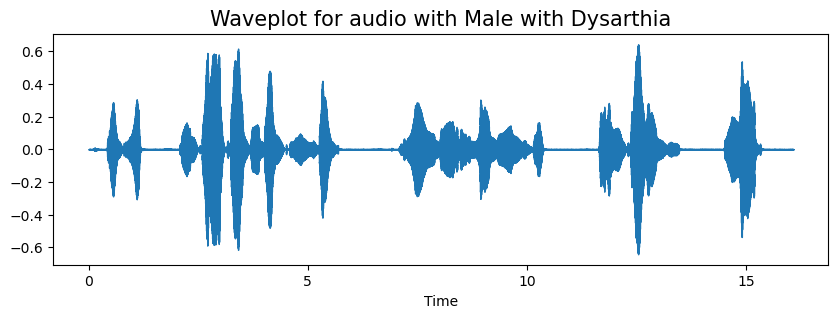

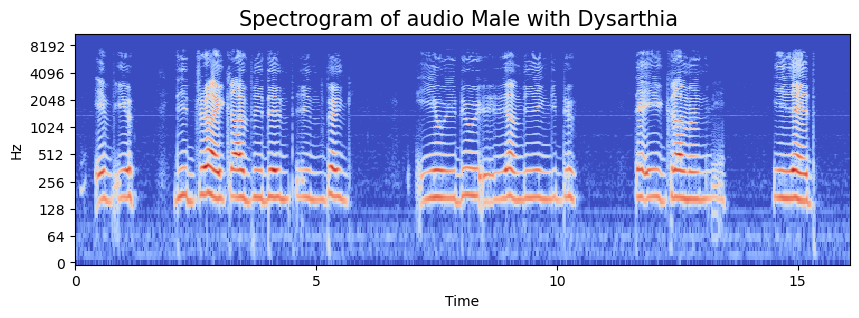

Sum of zero crossing  20903


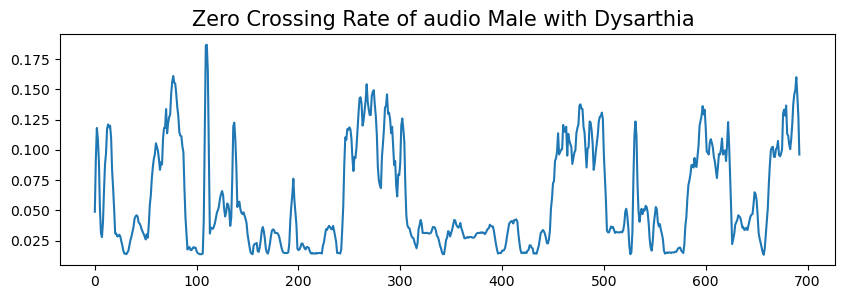

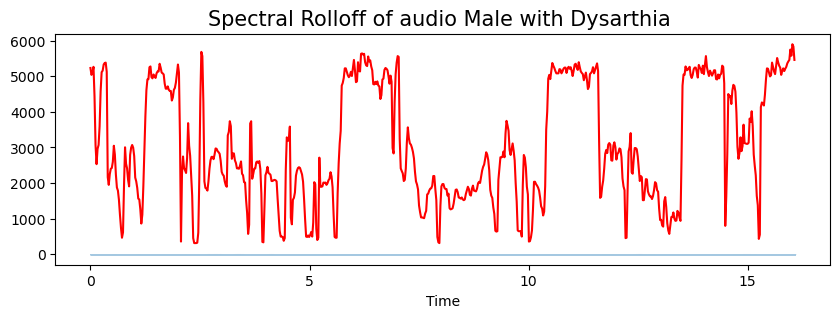

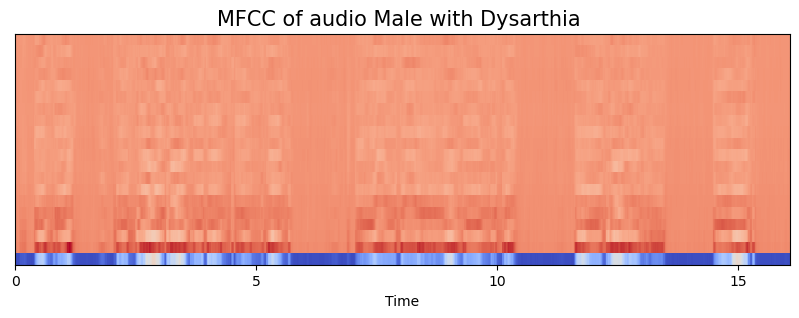

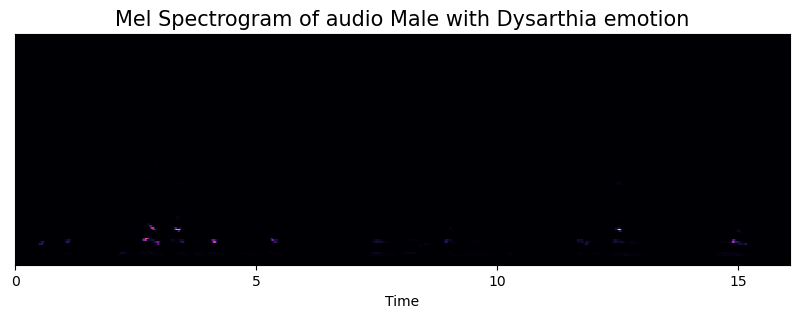

In [8]:
dysarthricMALE = d[(d['gender']=='male') & (d['is_dysarthria']=='dysarthria') ]
DM = dysarthricMALE.sample()
x= DM.iloc[0].filename
info= "Male with Dysarthia"
data, sampling_rate = librosa.load(x)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
#create_Spectral_centroid(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)
Audio(x)


## Female with Dysarthia



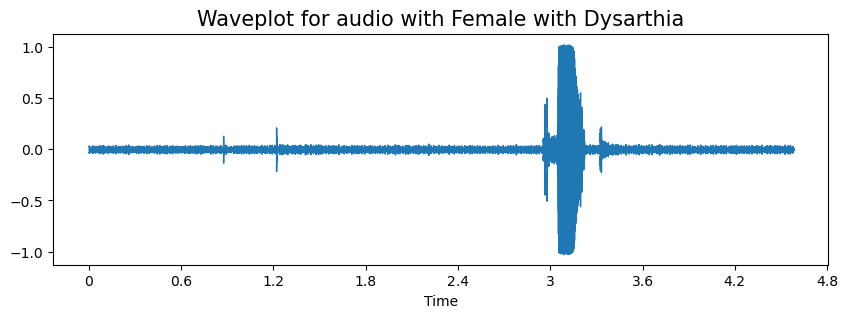

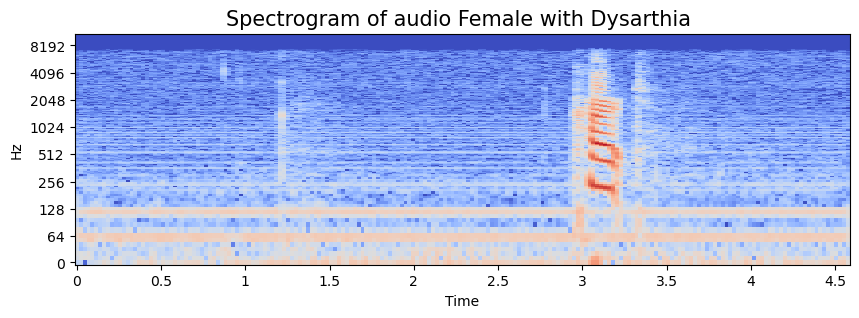

Sum of zero crossing  8793


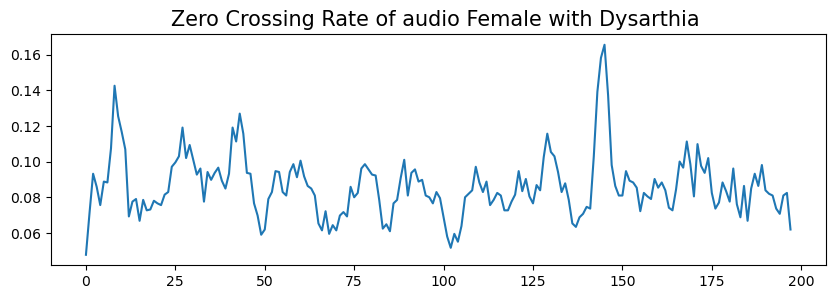

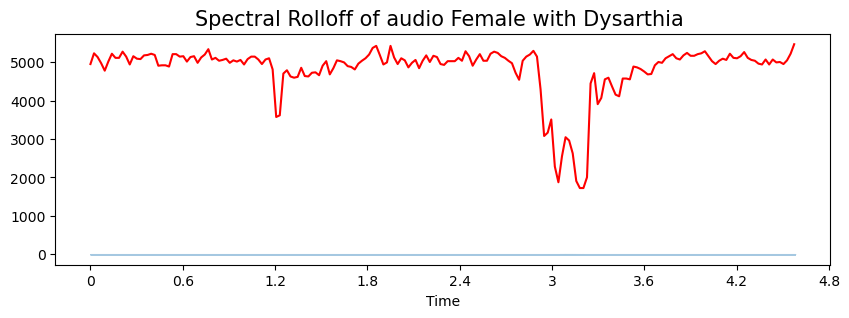

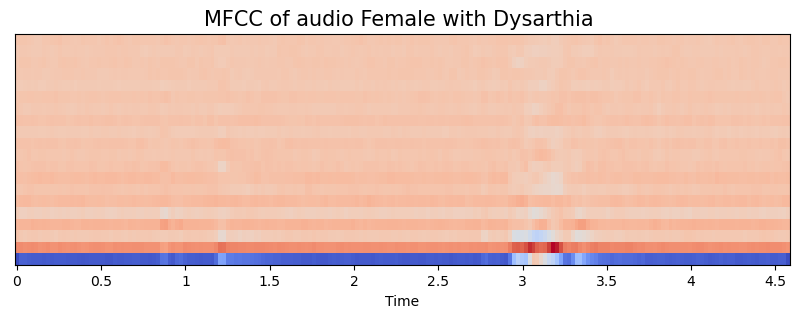

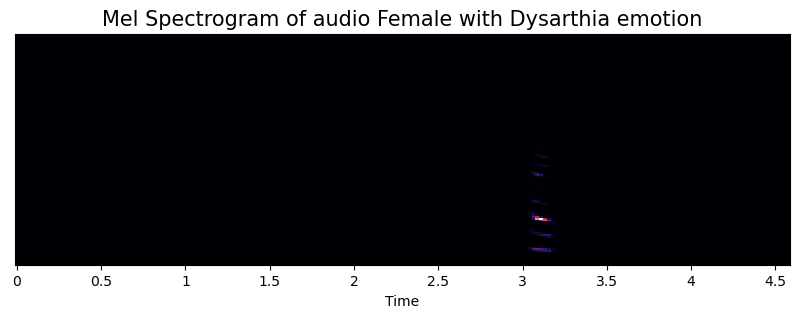

In [9]:
dysarthricFemale = d[(d['gender']=='female') & (d['is_dysarthria']=='dysarthria')]

DF = dysarthricFemale.sample()
x= DF.iloc[0].filename

info= "Female with Dysarthia"
data, sampling_rate = librosa.load(x)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
#create_Spectral_centroid(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)
Audio(x)



## Male not with Dysarthia


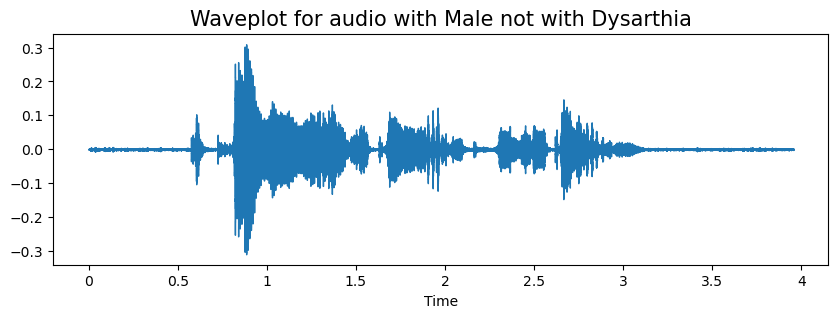

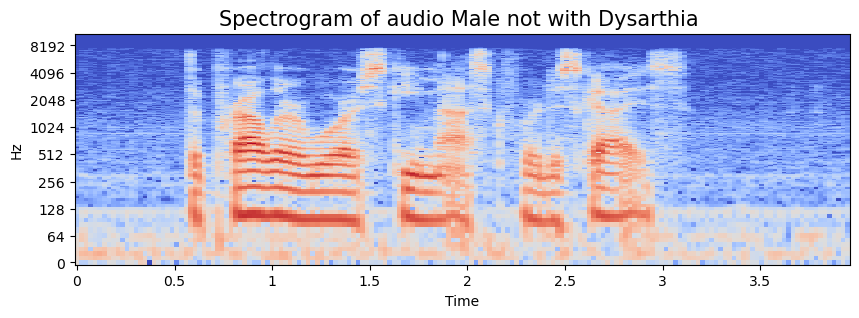

Sum of zero crossing  7485


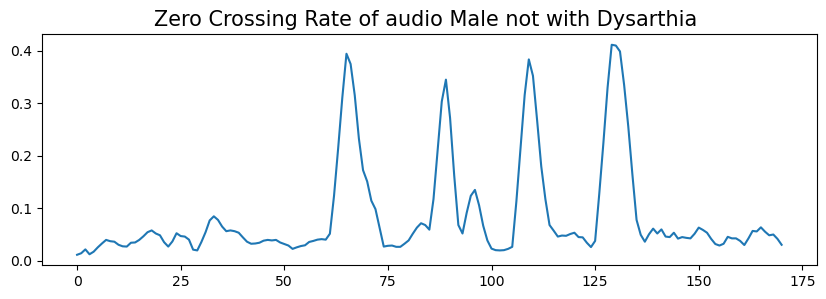

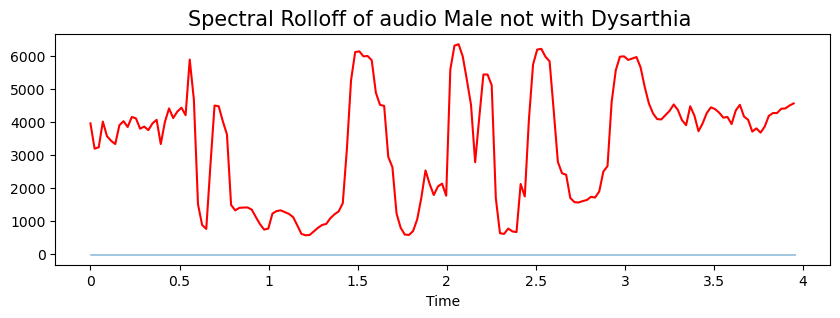

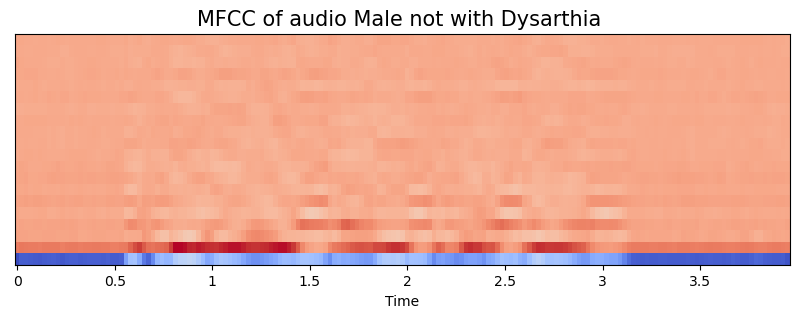

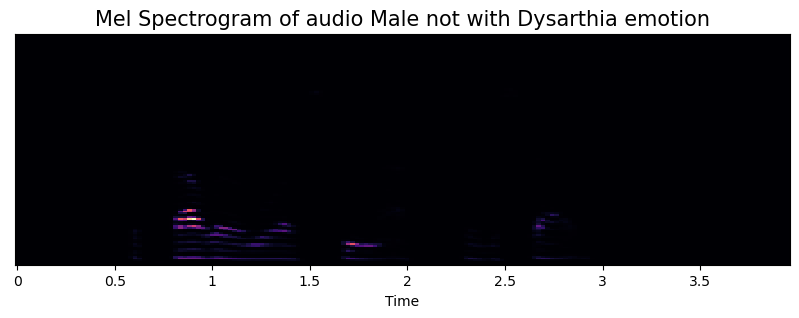

In [10]:
non_dysarthricMale  = d[(d['gender']=='male') & (d['is_dysarthria']=='non_dysarthria')]
NDM = non_dysarthricMale.sample()
v= NDM.iloc[0].filename
info= "Male not with Dysarthia"
data, sampling_rate = librosa.load(v)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
#create_Spectral_centroid(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)

Audio(v)



## Female with Non-Dysarthia

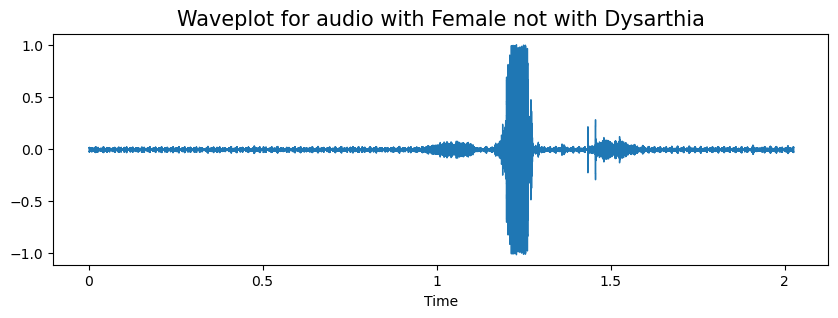

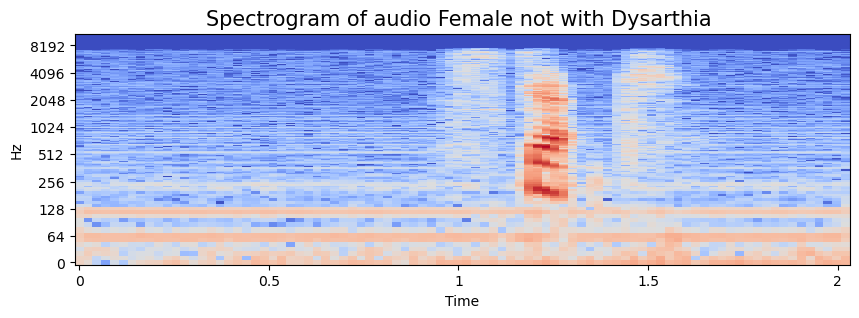

Sum of zero crossing  4672


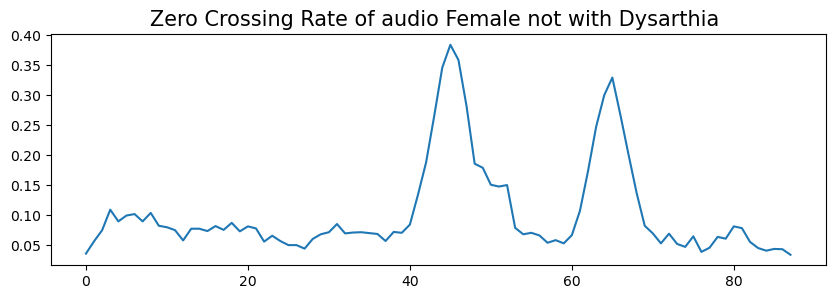

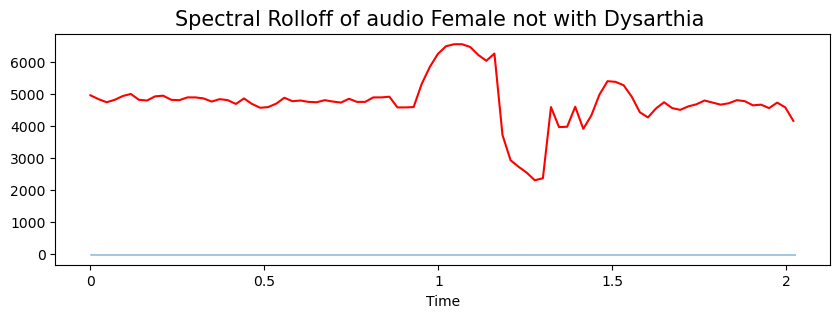

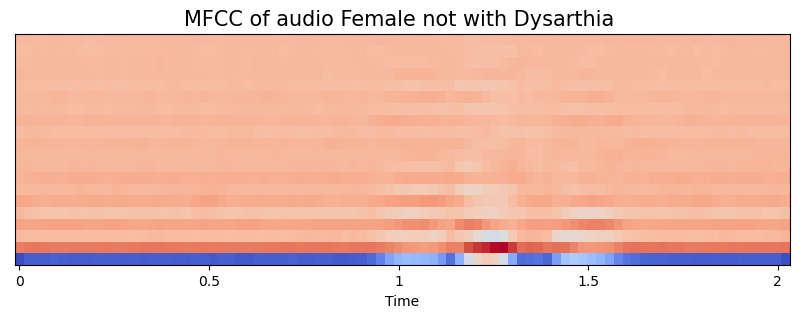

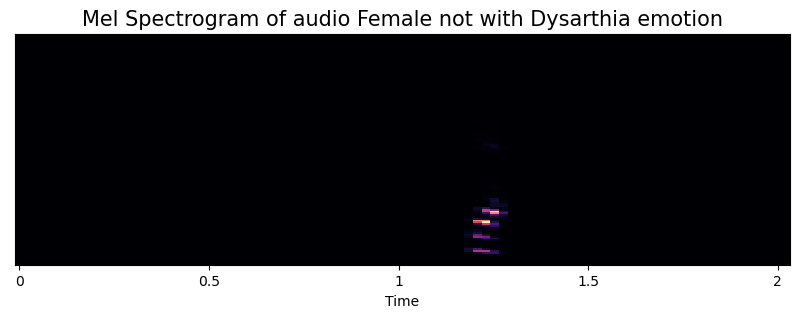

In [11]:
non_dysarthricFemale = d[(d['gender']=='female') & (d['is_dysarthria']=='non_dysarthria')]
NDF= non_dysarthricFemale.sample()
w= NDF.iloc[0].filename
info= "Female not with Dysarthia"
data, sampling_rate = librosa.load(w)
create_waveplot(data, sampling_rate, info)
create_Spectogram(data, sampling_rate, info)
create_Zero_crossing_rate(data, sampling_rate, info)
#create_Spectral_centroid(data, sampling_rate, info)
create_Spectral_rolloff(data, sampling_rate, info)
create_mfcc(data, sampling_rate, info)
create_mel_Spectogram(data, sampling_rate, info)

Audio(w)



##  Comment on the output.

#### Waveplot: The male dysarthric waveplot has abrupt speech signal. The female dysarthric waveplot has abrupt speech  due to the words overlapping
The Non-dysarthric waveplot a  waveplot shows a normal speech waveplot
 
#### Spectrograms
The male and female dysarthric spectrograms have energy magnitudes of the frequencies which are more spread 
The Non dysarthric spectrograms have energy magnitudes that are narrow where they are speaking.

#### Zero Crossing Rate
The male and female dysarthrics Zero Crossing Rate have many peaks of zero crossing rate. It shows a  sudden increase of some words.
The Non dysarthric Zero Crossing Rate is high.

#### Spectral Centroid
The male and female dysarthrics spectral centroids, centroids go down for sometime then go again up.
The Non dysarthric spectral centroids, the centroids stay down for but where the they say something then go up again when they are silent.

#### Spectral Rolloff
Dysarthric Spectral Rolloff ,the 85% coverage below the rolloff frequency is there around the speech.
Non dysarthric Spectral Rolloff the 85% coverageis also at some other places.

#### MFCCs
Dysarthric MFCC is much more darker and concentrated
Non Dysarthric MFCC is more spread accross

### Mel Spectrogram
Dysarthric mel spectrograms show the abtruptness in speaking
Non Dysarthric  mel spectrograms show normal speech

## Define a function to create 256 MFCC features for any given audio file.


Could have 128 maximum MFCCs

In [12]:
def mfcc_features_extract(x):

    features_mfcc = []
    try:
        x , sr = librosa.load(x)
        features_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        features_mfcc = np.mean(features_mfcc.T,axis=0)
    except:
        print('Error reading audio')
    return features_mfcc

In [13]:
N= d['filename'].apply(lambda a: mfcc_features_extract(a))


Error reading audio


In [14]:
N= N.tolist()
N= pd.DataFrame(N)

In [15]:
N.head(10)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-221.788269,101.259232,-16.548128,38.492065,-13.595651,20.772558,-5.536352,10.410690,1.962460,-0.799047,...,1.363242,0.962194,0.744855,1.058081,0.388451,0.081759,0.546172,0.594358,0.170033,-0.219215
1,-299.520081,109.872574,-17.097265,38.854965,-16.881124,22.959129,1.824228,18.724188,3.448539,4.455823,...,1.329315,1.105590,1.056283,1.252576,0.027334,-1.368949,-0.037860,0.020663,-0.082126,-0.744831
2,-302.950043,112.048485,-23.679876,44.887421,-22.434723,26.299335,0.811477,18.210289,4.344696,4.912156,...,0.993410,0.844332,0.530005,1.018391,0.055385,-1.472087,0.295324,0.191228,-0.224301,-0.582725
3,-210.861603,116.504486,-35.046494,37.670425,-27.112514,25.593725,-7.511986,13.140748,-0.587346,4.138087,...,1.068849,0.630752,0.898457,0.721398,0.174576,-0.090706,0.001524,0.360464,-0.075448,-0.259716
4,-280.227203,104.505051,-17.209881,45.064888,-15.542126,28.115068,-3.449212,16.841440,4.573239,1.738296,...,1.486206,1.596206,0.970084,0.732017,0.547591,-0.152662,0.131891,-0.288228,-0.468571,-0.461725
5,-278.383362,100.406921,-13.620473,43.185123,-20.576670,28.462549,-2.768835,17.264549,4.051350,3.575869,...,0.977128,1.273097,0.668057,0.650626,0.417460,-0.521614,0.246113,0.033732,-0.392851,-0.575430
6,-259.562317,105.800743,-18.014458,38.990742,-20.763634,25.383528,-0.809450,13.378078,-0.644927,2.570259,...,1.224453,1.161034,0.929470,1.102941,0.644086,-0.338245,0.459481,0.518777,0.046223,0.006182
7,-259.700928,118.702637,-11.923309,32.010925,-19.615616,17.748121,2.262589,7.991323,-0.416306,6.148558,...,0.460282,-0.072306,0.310545,0.476455,-0.068659,-0.962328,-0.111009,0.328579,-0.305427,-0.260911
8,-299.119904,110.268265,-20.741716,36.179428,-18.494825,23.903576,6.911687,20.933388,5.860125,4.909702,...,1.272139,1.085125,0.771311,0.927249,-0.044614,-1.266807,0.003891,-0.357512,-0.496980,-0.654187
9,-308.697906,116.575417,-24.820480,39.277859,-12.851312,4.379051,-12.422796,-5.025280,-2.216662,0.652395,...,0.677492,0.953371,0.291449,0.049954,-0.126010,-0.029416,-0.131502,-0.249924,-0.080363,0.224779


## Split the data into training and validation by a ratio of 90:10.


In [16]:
N['Dysarthia'] = d['is_dysarthria']

In [17]:
N.loc[N['Dysarthia']=='non_dysarthria','Dysarthia'] = 0
N.loc[N['Dysarthia']=='dysarthria','Dysarthia'] = 1

In [18]:
N["Dysarthia"].value_counts()

0    1000
1    1000
Name: Dysarthia, dtype: int64

In [19]:
N.isna().sum().sum()

128

In [20]:
N = N.dropna()

In [21]:
N["Dysarthia"].value_counts()

0    1000
1     999
Name: Dysarthia, dtype: int64

In [22]:
X = N.drop(['Dysarthia'],axis=1)
y = N['Dysarthia'].astype(float)

In [23]:
print("Shape of X and y: ", X.shape, y.shape)

Shape of X and y:  (1999, 128) (1999,)


In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [25]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [27]:
X_train_scaled = X_train_scaled.reshape(-1,16,8,1)
X_val_scaled = X_val_scaled.reshape(-1,16,8,1)
print("Shape of X_train and X_test: ", X_train_scaled.shape, X_val_scaled.shape)

Shape of X_train and X_test:  (1799, 16, 8, 1) (200, 16, 8, 1)


## Build the CNN-GRU model with padding on a training set.
 

In [28]:
model_GRU = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Reshape((16, -1)),
    tf.keras.layers.GRU(16, return_sequences=False),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
model_GRU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 4, 16)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 16)          2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 2, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 1, 16)          0

In [30]:
model_GRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
cb = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1)

In [32]:
history = model_GRU.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled,y_val), callbacks=[cb])

Epoch 1/50
57/57 [==============================] - 1s 6ms/step - loss: 0.6645 - accuracy: 0.6270 - val_loss: 0.6408 - val_accuracy: 0.6650
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.5270 - accuracy: 0.7782 - val_loss: 0.5469 - val_accuracy: 0.7300
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3370 - accuracy: 0.8610 - val_loss: 0.3353 - val_accuracy: 0.8450
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.1813 - accuracy: 0.9316 - val_loss: 0.2403 - val_accuracy: 0.9000
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 0.1052 - accuracy: 0.9655 - val_loss: 0.1592 - val_accuracy: 0.9450
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 0.9828 - val_loss: 0.1304 - val_accuracy: 0.9350
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9928 - val_loss: 0.1407 - val_accuracy: 0.9550
Epoch 8/50
57/57 [==

## Evaluate the validation set

### Visualization

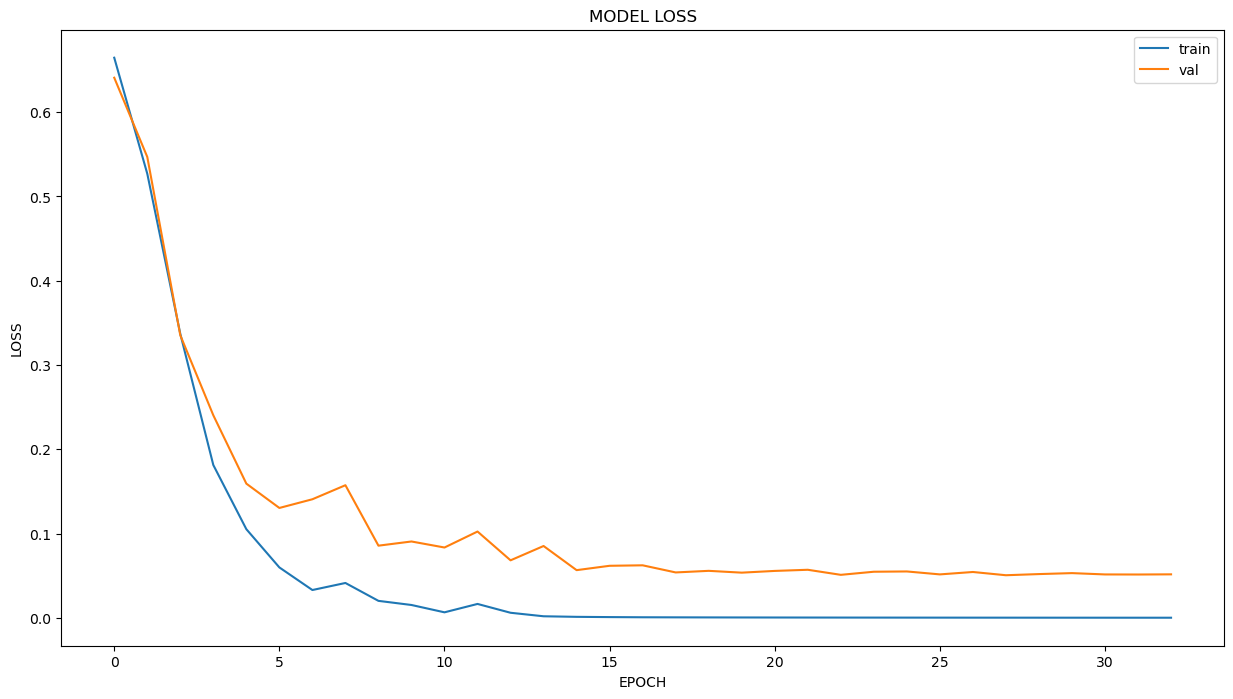

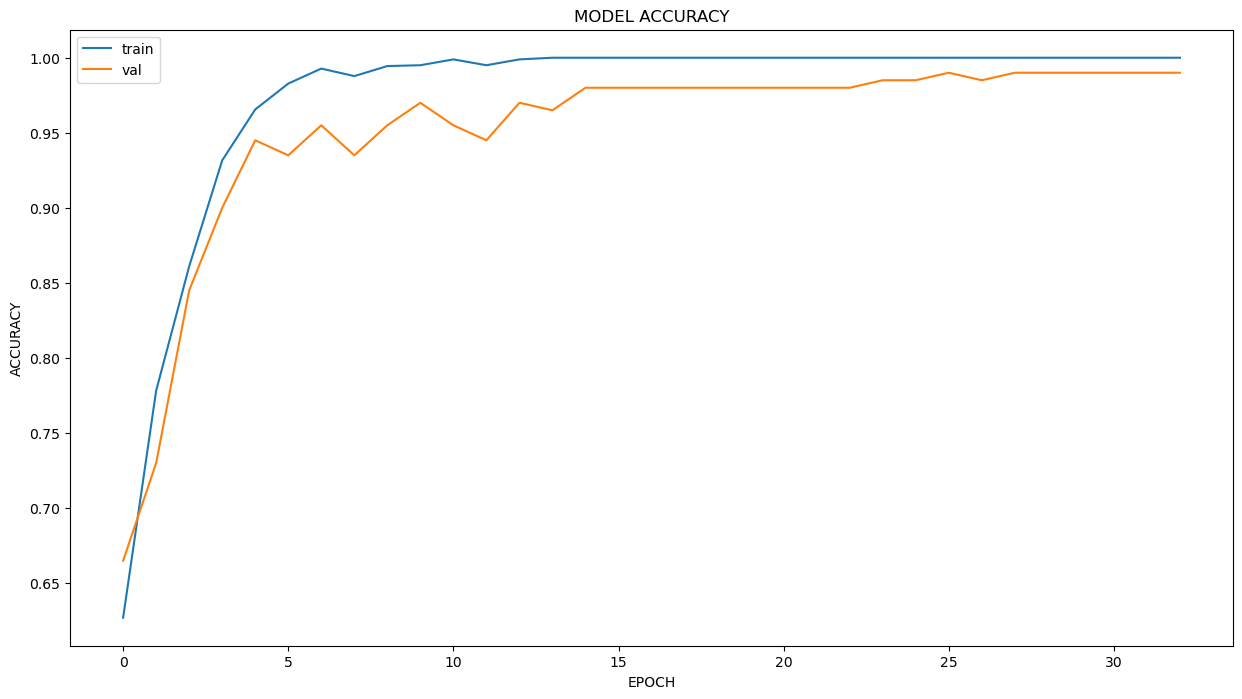

In [33]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('MODEL LOSS')
plt.legend(['train', 'val'])
plt.show()

plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.title('MODEL ACCURACY')
plt.legend(['train', 'val'])
plt.show()

In [34]:
ypred = model_GRU.predict(X_val_scaled)

7/7 [==============================] - 0s 1ms/step


## Calculate and comment on ROC AUC score, recall score and confusion matrix.





In [35]:
roc_auc_score(y_val,ypred)

0.9988995598239296

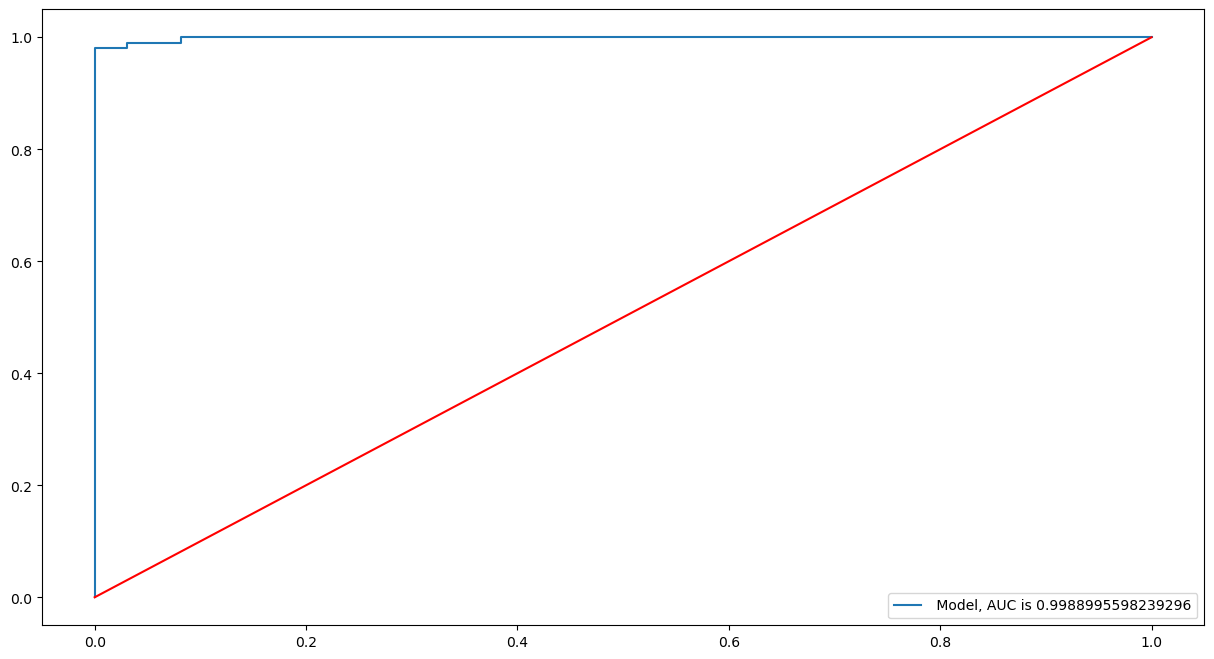

In [36]:
plt.figure(figsize=(15,8))
f, t, _ = roc_curve(y_val,  ypred)
AUC_score = roc_auc_score(y_val, ypred)
plt.plot(f,t,label=" Model, AUC is "+str(AUC_score))
plt.plot([0, 1], [0, 1], color="red")
plt.legend(loc=4)
plt.show()


In [37]:
ypred[ypred>=0.5] = 1
ypred[ypred<0.5] = 0

### Recall Score

In [38]:
print("Recall Score ",recall_score(y_val,ypred))

Recall Score  0.9803921568627451


### Classification Report

In [39]:
print(classification_report(y_val,ypred))


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        98
         1.0       1.00      0.98      0.99       102

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



### Confusion Matrix



Testing Accuracy =  99.0


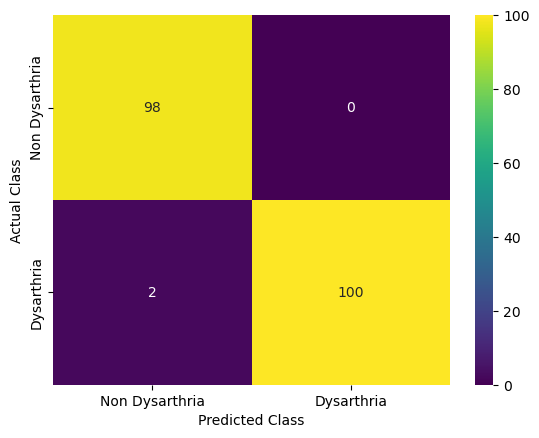

In [40]:

print("Testing Accuracy = ",accuracy_score(y_val,ypred)*100)
sns.heatmap(confusion_matrix(y_val, ypred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()




##  Build the CNN- LSTM model with padding on a training set.



In [41]:
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Reshape((16, -1)),
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [42]:
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 4, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 4, 16)          2320      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 2, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 2, 16)          2320      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 1, 16)         

In [43]:
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
cb = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1)

In [45]:
history = model_LSTM.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled,y_val), callbacks=[cb])

Epoch 1/50
57/57 [==============================] - 1s 7ms/step - loss: 0.6542 - accuracy: 0.6526 - val_loss: 0.5910 - val_accuracy: 0.7300
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4966 - accuracy: 0.7865 - val_loss: 0.4975 - val_accuracy: 0.7650
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3539 - accuracy: 0.8599 - val_loss: 0.3500 - val_accuracy: 0.8450
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.2204 - accuracy: 0.9172 - val_loss: 0.2756 - val_accuracy: 0.9000
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 0.1587 - accuracy: 0.9372 - val_loss: 0.2847 - val_accuracy: 0.8750
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.1035 - accuracy: 0.9605 - val_loss: 0.2216 - val_accuracy: 0.9000
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.1630 - accuracy: 0.9416 - val_loss: 0.1836 - val_accuracy: 0.9250
Epoch 8/50
57/57 [==

## Evaluate the validation set

### Visualization

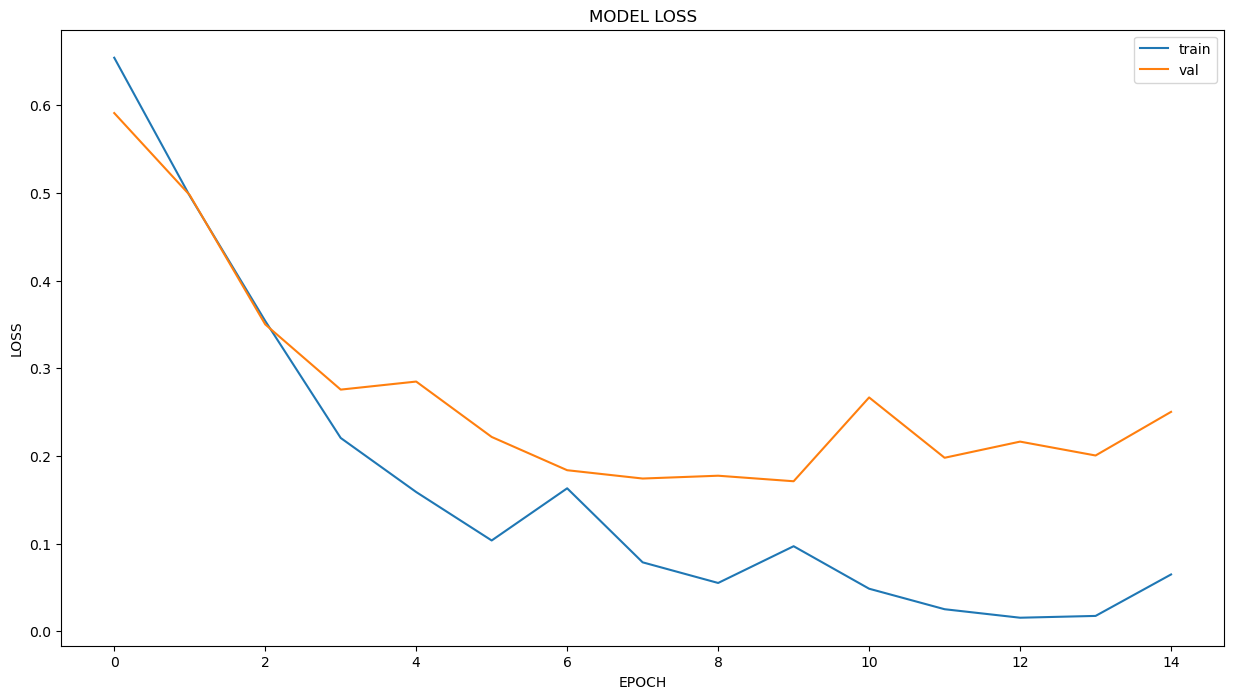

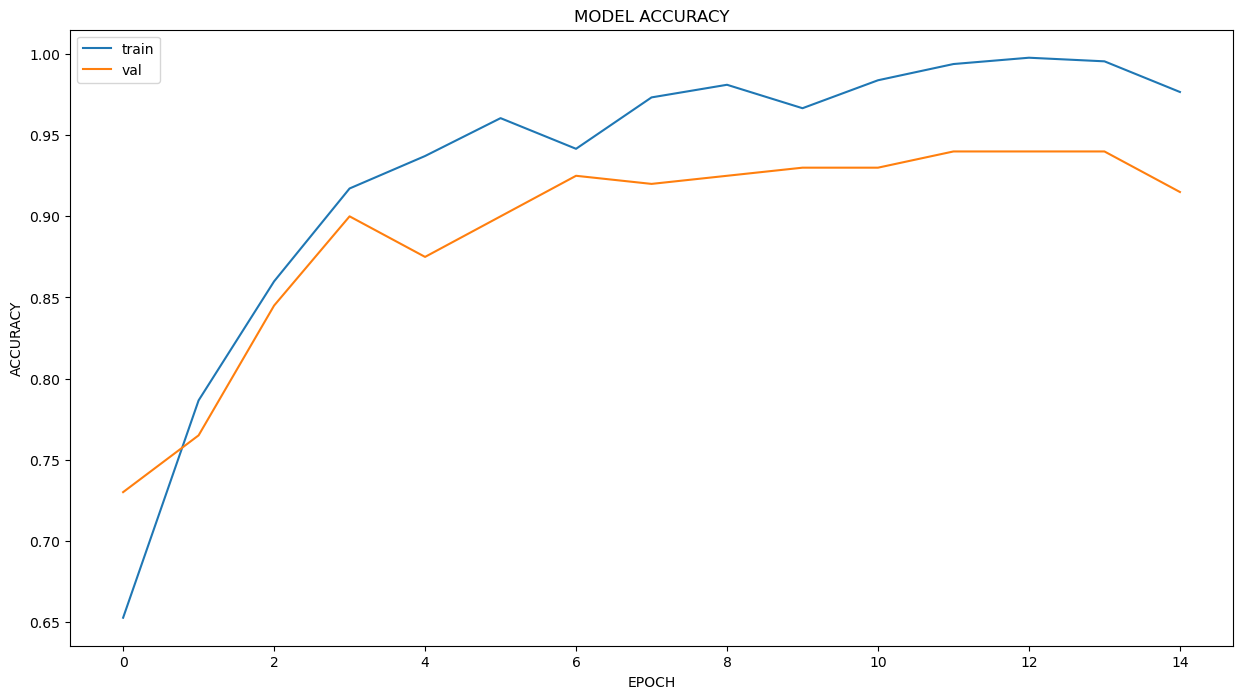

In [46]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('MODEL LOSS')
plt.legend(['train', 'val'])
plt.show()

plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.title('MODEL ACCURACY')
plt.legend(['train', 'val'])
plt.show()

In [47]:
ypred = model_LSTM.predict(X_val_scaled)

7/7 [==============================] - 0s 1ms/step


##  Calculate and comment on ROC AUC score, recall score and confusion matrix.


In [48]:
roc_auc_score(y_val,ypred)

0.990296118447379

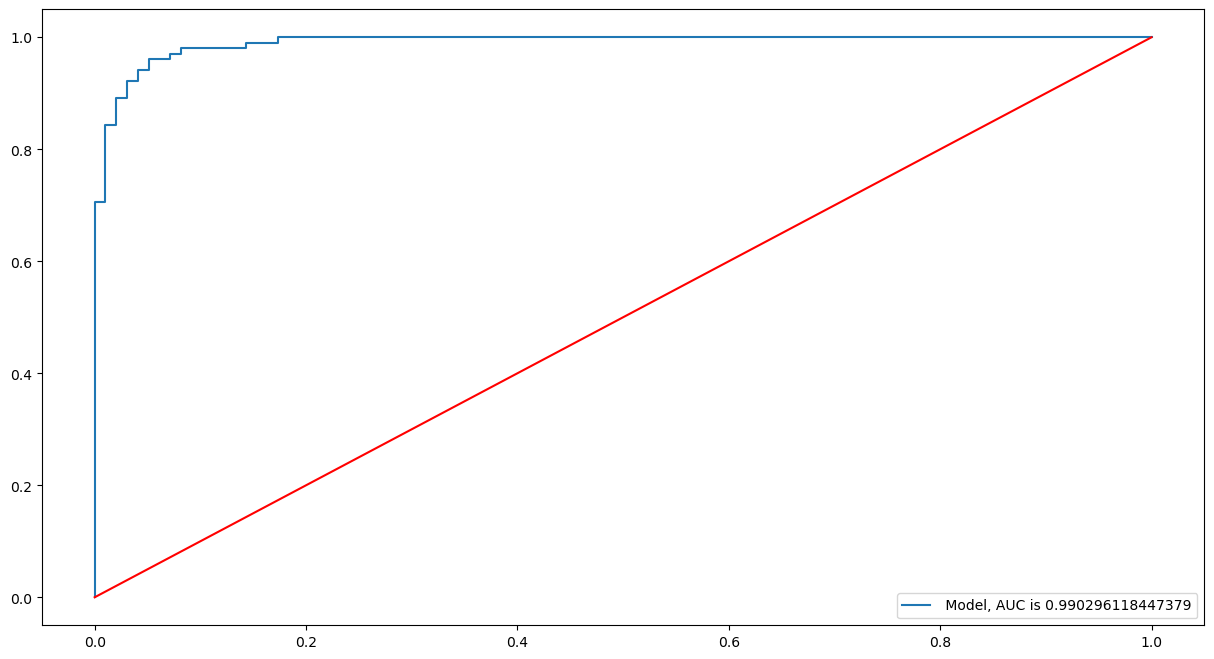

In [49]:
plt.figure(figsize=(15,8))
f, t, _ = roc_curve(y_val,  ypred)
AUC_score = roc_auc_score(y_val, ypred)
plt.plot(f,t,label=" Model, AUC is "+str(AUC_score))
plt.plot([0, 1], [0, 1], color="red")
plt.legend(loc=4)
plt.show()

In [50]:
ypred[ypred>=0.5] = 1
ypred[ypred<0.5] = 0

### Recall Score

In [51]:
print("Recall Score ",recall_score(y_val,ypred))

Recall Score  1.0


### Classification Report

In [52]:
print(classification_report(y_val,ypred))


              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        98
         1.0       0.86      1.00      0.92       102

    accuracy                           0.92       200
   macro avg       0.93      0.91      0.91       200
weighted avg       0.93      0.92      0.91       200



### Confusion Matrix


Testing Accuracy =  91.5


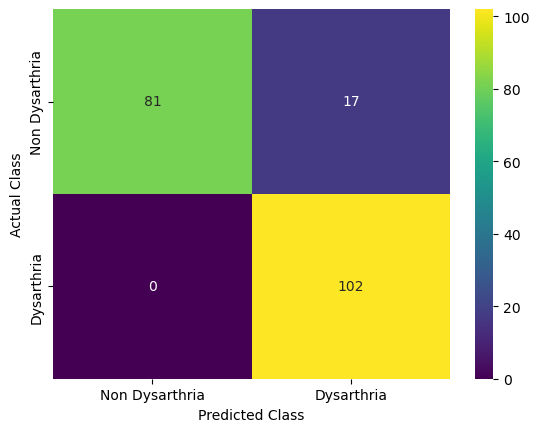

In [53]:
print("Testing Accuracy = ",accuracy_score(y_val,ypred)*100)
sns.heatmap(confusion_matrix(y_val, ypred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()




##  Build the CNN model with padding on a training set.


In [54]:
model_CNN = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [55]:
model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 4, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 4, 16)          2320      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 2, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 2, 16)          2320      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 1, 16)         

In [56]:
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
cb = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1)

In [58]:
history = model_CNN.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled,y_val), callbacks=[cb])

Epoch 1/50
57/57 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.7254 - val_loss: 0.5356 - val_accuracy: 0.7100
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8155 - val_loss: 0.4246 - val_accuracy: 0.7700
Epoch 3/50
57/57 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.8799 - val_loss: 0.4044 - val_accuracy: 0.7950
Epoch 4/50
57/57 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9266 - val_loss: 0.2791 - val_accuracy: 0.8750
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.9550 - val_loss: 0.1900 - val_accuracy: 0.9250
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9644 - val_loss: 0.1620 - val_accuracy: 0.9450
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9850 - val_loss: 0.1744 - val_accuracy: 0.9300
Epoch 8/50
57/57 [==

## Evaluate the validation set

### Visualization

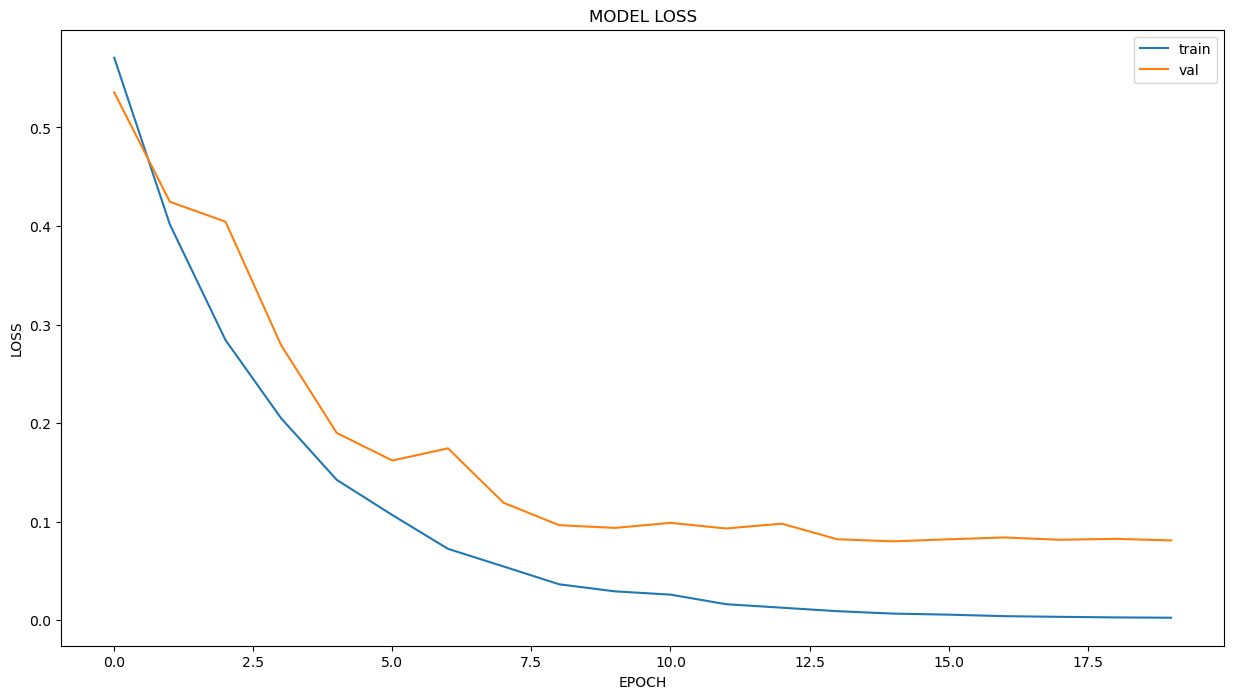

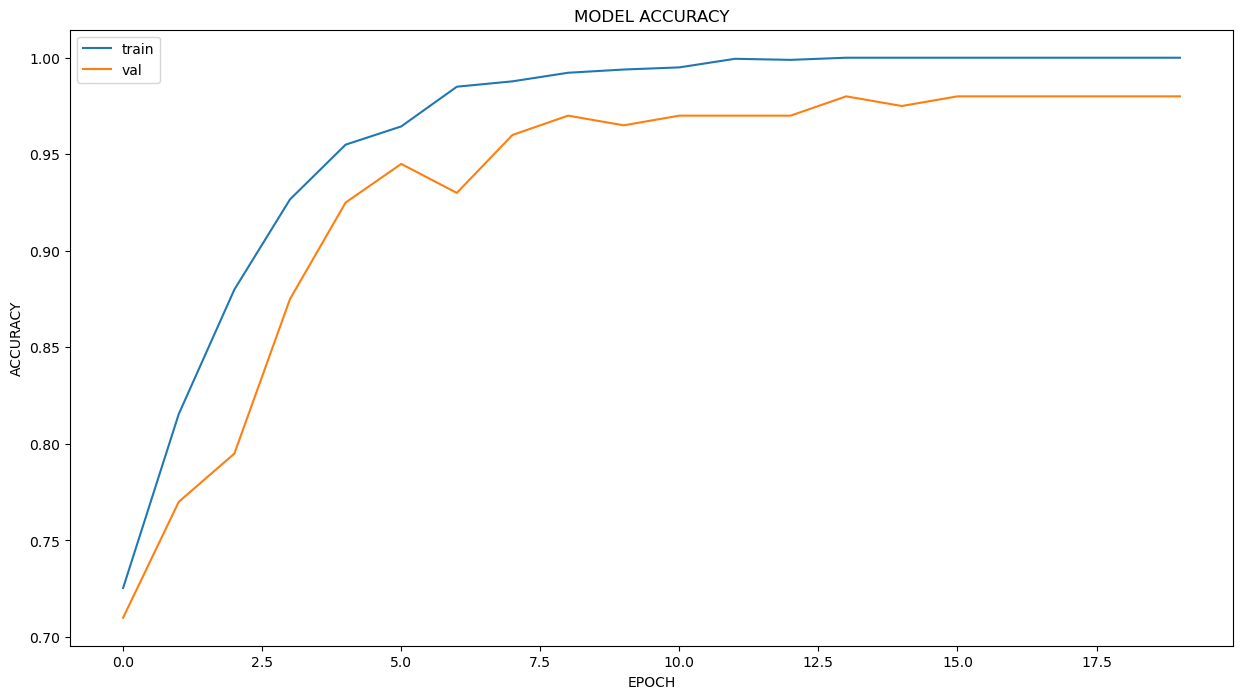

In [59]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('MODEL LOSS')
plt.legend(['train', 'val'])
plt.show()

plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.title('MODEL ACCURACY')
plt.legend(['train', 'val'])
plt.show()

In [60]:
ypred = model_CNN.predict(X_val_scaled)

7/7 [==============================] - 0s 1ms/step


##  Calculate and comment on ROC AUC score, recall score and confusion matrix.


In [61]:
roc_auc_score(y_val,ypred)

0.9959983993597439

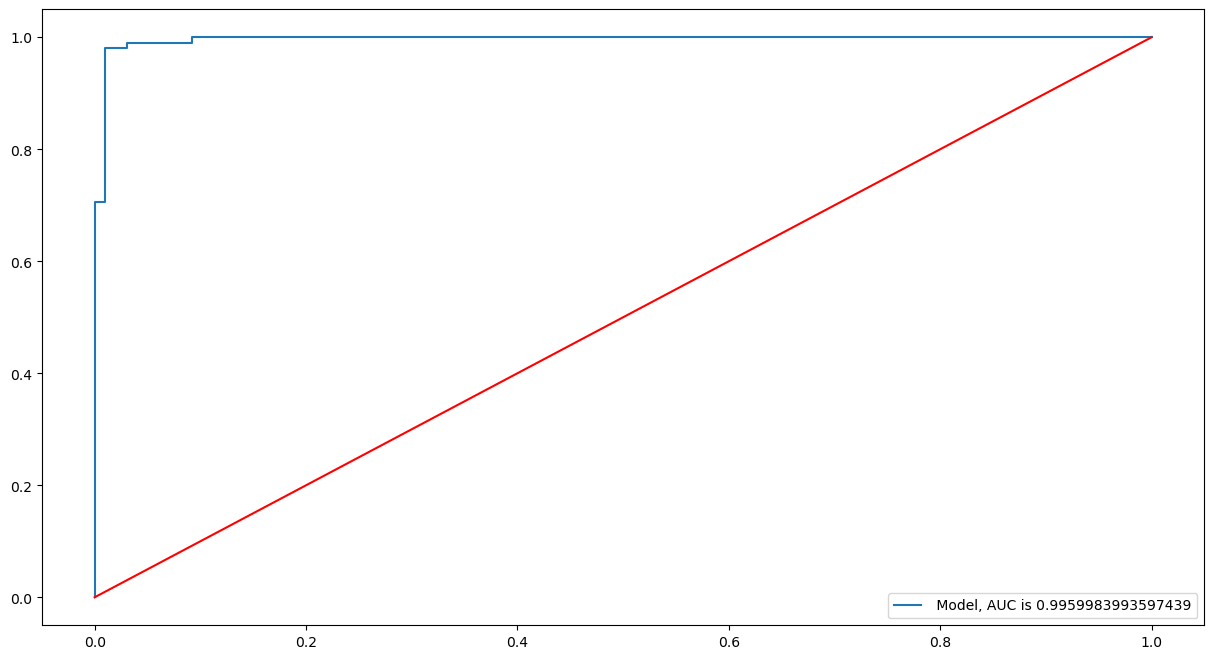

In [62]:
plt.figure(figsize=(15,8))
f, t, _ = roc_curve(y_val,  ypred)
AUC_score = roc_auc_score(y_val, ypred)
plt.plot(f,t,label=" Model, AUC is "+str(AUC_score))
plt.plot([0, 1], [0, 1], color="red")
plt.legend(loc=4)
plt.show()

In [63]:
ypred[ypred>=0.5] = 1
ypred[ypred<0.5] = 0

### Recall Score


In [64]:
print("Recall Score ",recall_score(y_val,ypred))

Recall Score  0.9901960784313726


### Classification Report


In [65]:
print(classification_report(y_val,ypred))


              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        98
         1.0       0.97      0.99      0.98       102

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



### Confusion Matrix


Testing Accuracy =  98.0


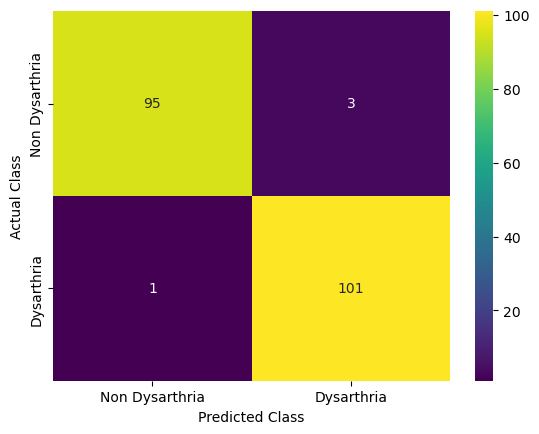

In [66]:
print("Testing Accuracy = ",accuracy_score(y_val,ypred)*100)
sns.heatmap(confusion_matrix(y_val, ypred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### CONCLUSION: The CNN, CNN-LSTM and CNN-GRU works well however on multiples runs, each model gives different accuracies, so we take avearge accuarcy to conclude that CNN-GRU has better accuarcy. 